# Stage 1

## Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

# Stage 2

## Importing and Understanding Data

In [2]:
# Import Data
df_day = pd.read_csv("day.csv")

In [3]:
# Retrieving few rows from the dataset
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Statistics & Quality Check

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Interpretation
- Null values not present in the dataset
- instant column can be made as the index of the dataset

In [5]:
# 1. Making instant column as the index column
df_day.set_index("instant", inplace=True)
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Interpretation
- holiday: The mean of the data is quite close to zero which means that most of the bikes rode are not on holidays
- workingday: the mean of the data is more closer to 1 than 0 meaning that most of the bikes rode were on working days. This provides us insight that many of our customers might be either students or working professionals
- casual v/s registered: the mean of casual is quite less than registered which signifies that many of our customers are registered to our platform

### Data check for abnormal values

In [7]:
# 1. Casual + Registerd values = cnt or not
print("No. of records where sum of casual and registers is not equal to cnt: ", df_day[df_day["casual"] + df_day["registered"] != df_day["cnt"]].shape)
print("--" * 30)
# All the values are correct

# 2. Since, humidity cant be negative, checking if some abnormal values are present or not
print("No. of records where humidity is negative: ", df_day[df_day["hum"] < 0].shape)
print("--" * 30)

# 3. Since, windspeed cant be negative, checking if some abnormal values are present or not
print("No. of records where windspeed is negative: ", df_day[df_day["windspeed"] < 0].shape)
print("--" * 30)

# 4. Check for blank spaces in season, yr, mnth, holiday, weekday, workingday, weathersit
print("Check for blank spaces in the below categorical variables")
for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
    print(f"Column: {col} ", df_day[col].unique())
print("--" * 30)

# 5. Check for temp all positives or not
print("No. of records where temp is negative: ", df_day[df_day["temp"] < 0].shape)
print("--" * 30)

No. of records where sum of casual and registers is not equal to cnt:  (0, 15)
------------------------------------------------------------
No. of records where humidity is negative:  (0, 15)
------------------------------------------------------------
No. of records where windspeed is negative:  (0, 15)
------------------------------------------------------------
Check for blank spaces in the below categorical variables
Column: season  [1 2 3 4]
Column: yr  [0 1]
Column: mnth  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Column: holiday  [0 1]
Column: weekday  [1 2 3 4 5 6 0]
Column: workingday  [1 0]
Column: weathersit  [2 1 3]
------------------------------------------------------------
No. of records where temp is negative:  (0, 15)
------------------------------------------------------------


### Interpretation
- Nothing looks abnormal in the dataset
- Temp is positive throughout the dataset which means the bikes provided are not in a cold region

## Data Cleaning

### Interpretation
- dteday: the year and month for this feature is already provided in the dataset. Hence, we can drop this feature as well
- casual and registerd: since the problem statement states that BoomBikes aspires to understand the factors on which the demand for these shared bikes depends, we can drop these two columns as we are not interested in knowing which category of the user will rent the bike but the factors that contributes towards the demand. Hence, dropping these two features as well.
- holiday v/s workingday: these two features convey the same thing. When its holiday it will not be a working day and vice versa. Hence, we can drop any one of the feature. Since, people are less likely to rent a shared bike on holiday we drop holiday feature as well

In [8]:
df_day1 = df_day.drop(["dteday", "holiday", "casual", "registered"], axis=1)

# Stage 3

## Data Visualization

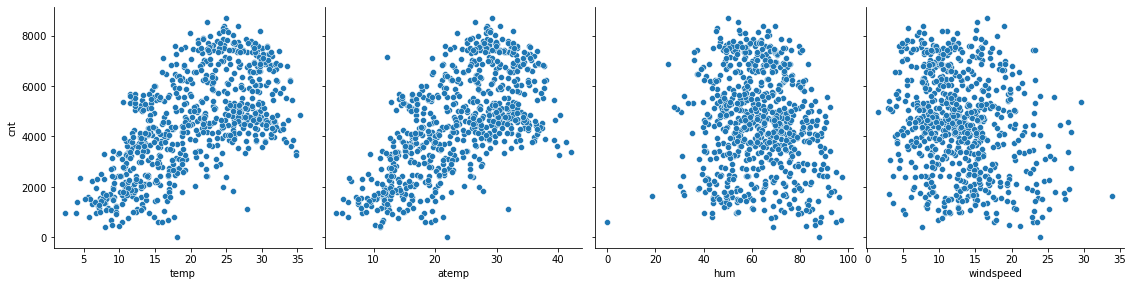

In [9]:
sns.pairplot(data=df_day1, x_vars=["temp", "atemp", "hum", "windspeed"], y_vars="cnt", size=4, aspect=1, kind="scatter", diag_kind=None)
plt.show()

### Interpretation
- temp and atemp: linear in nature. As the temp rises the number of people the count of rental bikes seem to rise
- hum and windspeed: not quite linear in nature. As the value of hum or windspeed rises the count of rental bikes doesn't seem to get affected

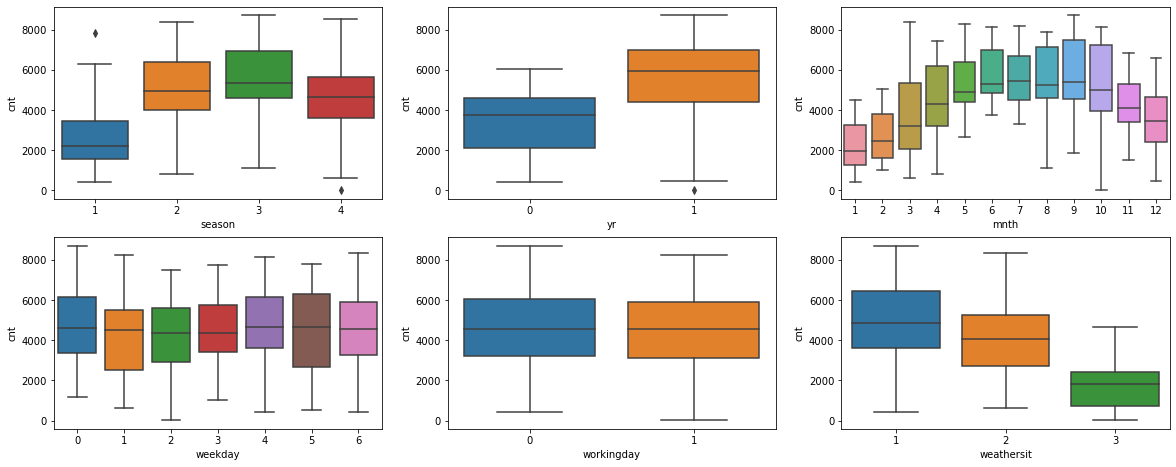

In [10]:
plt.figure(figsize=[20, 12])
plt.subplot(3, 3, 1)
sns.boxplot(x="season", y="cnt", data=df_day1)
plt.subplot(3, 3, 2)
sns.boxplot(x="yr", y="cnt", data=df_day1)
plt.subplot(3, 3, 3)
sns.boxplot(x="mnth", y="cnt", data=df_day1)
plt.subplot(3, 3, 4)
sns.boxplot(x="weekday", y="cnt", data=df_day1)
plt.subplot(3, 3, 5)
sns.boxplot(x="workingday", y="cnt", data=df_day1)
plt.subplot(3, 3, 6)
sns.boxplot(x="weathersit", y="cnt", data=df_day1)
plt.show()

### Interpretation
- season: the count of rental bikes increase when its not spring season
- yr: the count of rental bikes have increased over the year
- mnth: the count of rental bikes till September
- workingday & weekday: the count of rental bikes seems to be quite stable across the week
- weathersit: the count of rental bikes is 0 when there is heavy rain or thunderstorm. On the other hand the demand for rental bikes is highest when the weather is not snowy or rainy

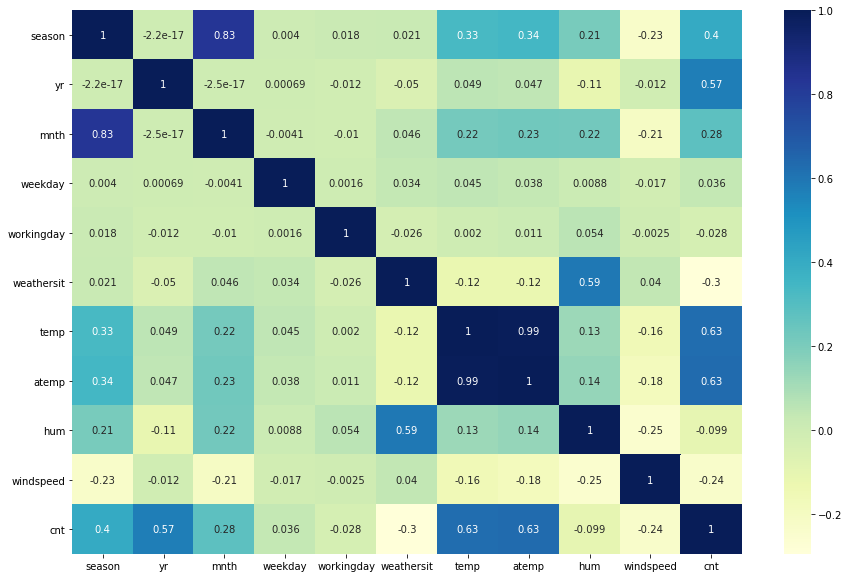

In [11]:
plt.figure(figsize=[15, 10])
sns.heatmap(df_day1.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Interpretation
- the dependent variable "cnt" is highly correlated with predictors --> temp, atemp
- the dependent variable "cnt" is not highly correlated with predictors --> weekday, workingday, and hum

# Stage 4

## Preparing data for modeling

In [12]:
df_day1.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Converting categorical variables for the feature: season
df_day1["season"] = df_day1["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Converting categorical variables for the feature: month
# Since we don't know if 1 corresponds to Jan mapping the mnth 1 as mnth_1, 2 as mnth_2, ..... , 12 as mnth_12
df_day1["mnth"] = df_day1["mnth"].map({1:"mnth_1", 2:"mnth_2", 3:"mnth_3", 4:"mnth_4", 5:"mnth_5", 6:"mnth_6", 7:"mnth_7", 8:"mnth_8", 9:"mnth_9", 10:"mnth_10", 11:"mnth_11", 12:"mnth_12"})

# Converting categorical variables for the feature: weekday
# Since we don't know if 1 corresponds to Monday or any other day mapping 1 as day_1, 2 as day_2, .... , 7 as day_7
df_day1["weekday"] = df_day1["weekday"].map({0: "day_0", 1:"day_1", 2: "day_2", 3: "day_3", 4: "day_4", 5: "day_5", 6: "day_6"})

# Converting categorical variables for the feature: weathersit
# Since, the respective category for weathersit feature has multiple possible explanations we name the following categories as below
# 1: weather_1
# 2: weather_2
# 3: weather_3
# 4: weather_4
df_day1["weathersit"] = df_day1["weathersit"].map({1:"weather_1", 2:"weather_2", 3: "weather_3", 4: "weather_4"})

In [14]:
# Rechecking the updated values
df_day1.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,mnth_1,day_1,1,weather_2,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,mnth_1,day_2,1,weather_2,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,mnth_1,day_3,1,weather_1,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,mnth_1,day_4,1,weather_1,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,mnth_1,day_5,1,weather_1,9.305237,11.46350,43.6957,12.522300,1600


## Creating dummy variables

In [15]:
# Creating dummy variables for the feature: season
season_dummy = pd.get_dummies(df_day1["season"], drop_first=True)
df_day1 = pd.concat([df_day1, season_dummy], axis=1)
df_day1 = df_day1.drop(["season"], axis=1)

# Creating dummy variables for the feature: mnth
mnth_dummy = pd.get_dummies(df_day1["mnth"], drop_first=True)
df_day1 = pd.concat([df_day1, mnth_dummy], axis=1)
df_day1 = df_day1.drop(["mnth"], axis=1)

# Creating dummy variables for the feature: weekday
mnth_dummy = pd.get_dummies(df_day1["weekday"], drop_first=True)
df_day1 = pd.concat([df_day1, mnth_dummy], axis=1)
df_day1 = df_day1.drop(["weekday"], axis=1)

# Creating dummy variables for the feature: weathersit
weathersit_dummy = pd.get_dummies(df_day1["weathersit"], drop_first=True)
df_day1 = pd.concat([df_day1, weathersit_dummy], axis=1)
df_day1 = df_day1.drop(["weathersit"], axis=1)

In [16]:
# Checking if above operations were successful or not
df_day1.info()
# Everything looks okay

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  mnth_10     730 non-null    uint8  
 11  mnth_11     730 non-null    uint8  
 12  mnth_12     730 non-null    uint8  
 13  mnth_2      730 non-null    uint8  
 14  mnth_3      730 non-null    uint8  
 15  mnth_4      730 non-null    uint8  
 16  mnth_5      730 non-null    uint8  
 17  mnth_6      730 non-null    uint8  
 18  mnth_7      730 non-null    uint8  
 19  mnth_8      730 non-null    u

# Stage 5

## Creating training and testing dataset

In [17]:
df_train, df_test = train_test_split(df_day1, train_size=0.7, random_state=100)
print("Training dataset shape: ", df_train.shape)
print("Test dataset shape: ", df_test.shape)

Training dataset shape:  (510, 29)
Test dataset shape:  (220, 29)


## Rescaling the features
- Since there are numeric variables in the dataset we need to bring them to the same scale i.e., between 0 and 1
- Hence, importing the minmax scaler
- __Note__: Not rescaling the binary variables as they are already in the range of 0 and 1

In [18]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()

In [19]:
# Creating list of features that needs to be rescaled
features = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Fitting and transforming the data
df_train[features] = scaler.fit_transform(df_train[features])
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_8,mnth_9,day_1,day_2,day_3,day_4,day_5,day_6,weather_2,weather_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
427,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
729,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
483,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0
112,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Stage 6

## Training the model

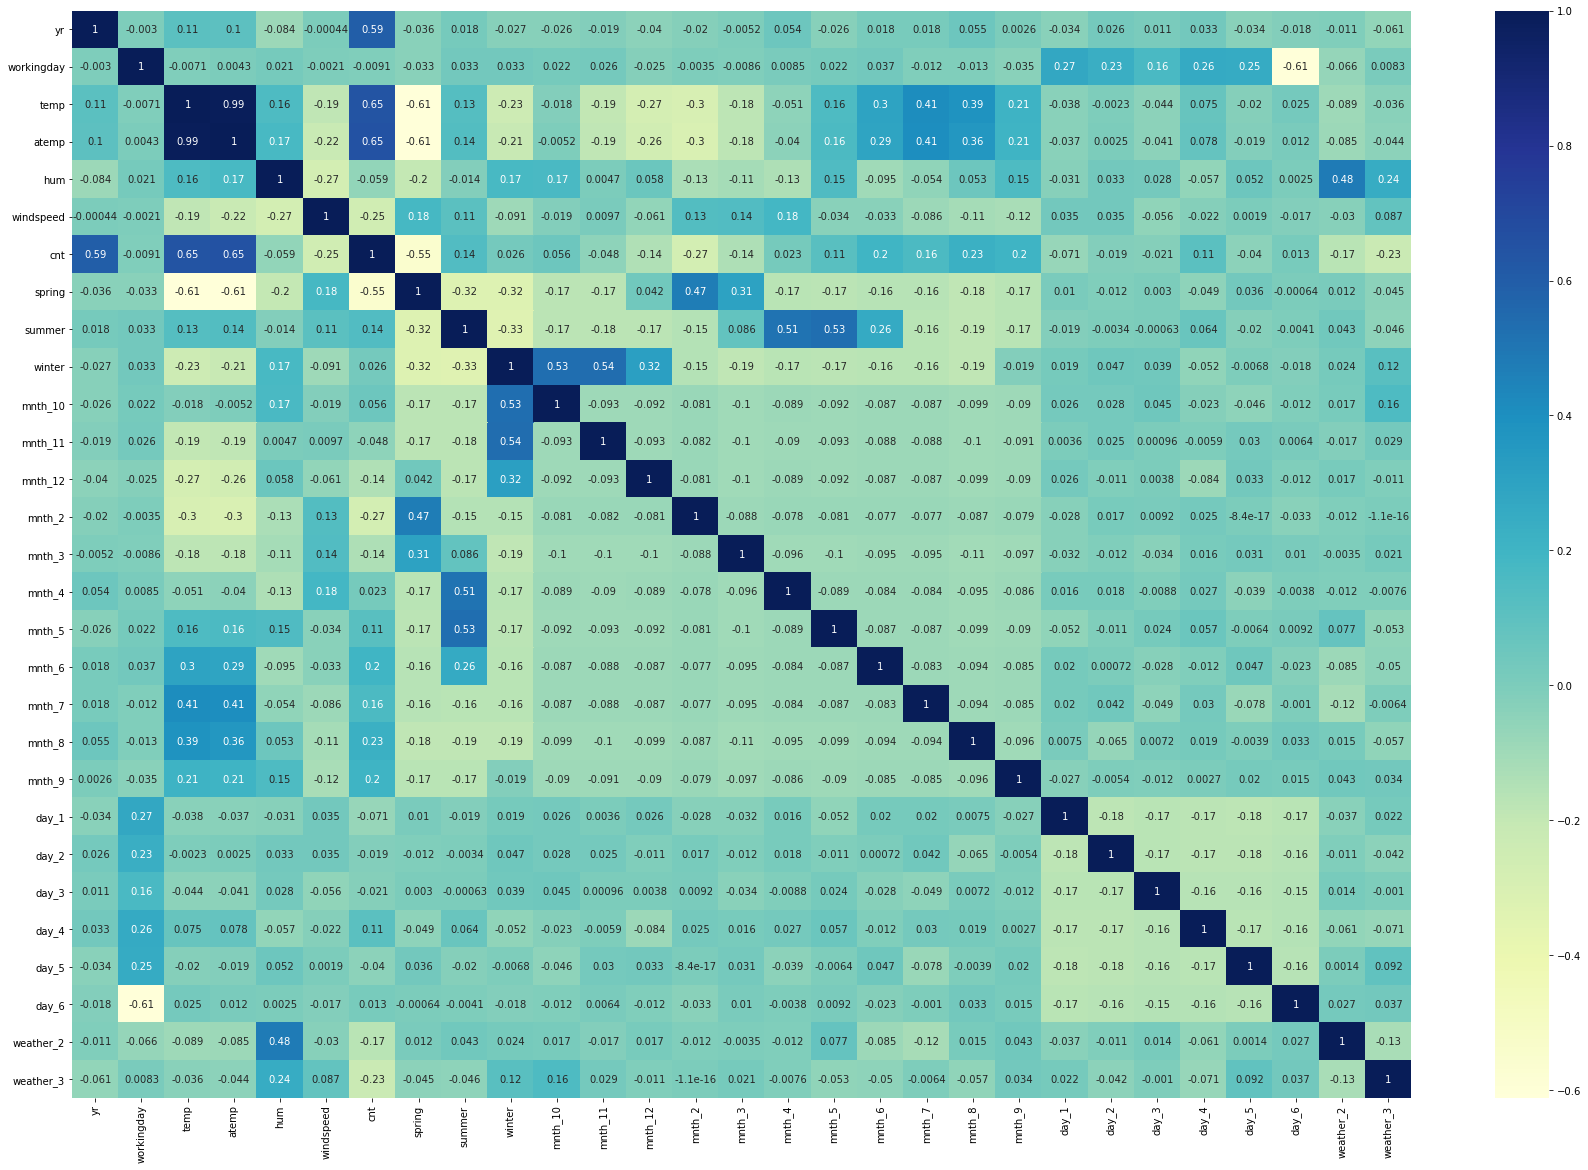

In [20]:
plt.figure(figsize=[30, 20])
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Interpretation
- As there are more than 20 predictors available, we can't use forward or backward selection process as it will become a very tedious task to carry out all the possible combinations
- Hence, we will use the balance approach methodolgy i.e.,
    - 1st use automated approach to select top N features using RFE
    - Manually intervening and removing the redundant variables

In [21]:
# Creating X and y datasets
y_train = df_train.pop("cnt")
X_train = df_train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


## Extracting top 20 features using RFE

In [22]:
# Creating linear regression object
lm = LinearRegression()

# Fitting the object
lm.fit(X=X_train, y=y_train)

# Running RFE and extracting top 20 features
rfe_20 = RFE(lm, 20)

# Fitting rfe
rfe_20 = rfe_20.fit(X_train, y_train)

In [23]:
# Extracting the top 20 cols
top_20_columns = X_train.columns[rfe_20.support_]
X_train_rfe = X_train[top_20_columns]
X_train_rfe.head()

,yr,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mnth_10,mnth_3,mnth_8,mnth_9,day_1,day_2,day_3,day_4,day_5,weather_2,weather_3
instant,,,,,,,,,,,,,,,,,,,,
577,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0
427,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,1,0
729,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0,0,0,0,0
483,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,1,0
112,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Building the model using statsmodels

### Interpretation
- Criteria for dropping features that are multicollinear in nature
    - High VIF, and High p-value: drop immediately and then create a new model
    - High p-value and Low VIF: remove these first, and then create a new model
    - Low p-value and High VIF: remove these and then create a new model
    - Low p-value and Low VIF: don't drop such features
- Threshold criteria
    - VIF < 5.5 is acceptable
    - p-value < 0.05 is acceptable

#### Model 1

In [24]:
# Adding constant for intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Creating and fitting the model
lm_ols_1 = sm.OLS(y_train, X_train_sm).fit()

# Extracting summary of the model
print(lm_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.85e-184
Time:                        21:18:57   Log-Likelihood:                 516.58
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     489   BIC:                            -902.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2764      0.036      7.726      0.0

#### Checking for multicollinearity

In [25]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,temp,382.47
3,atemp,372.32
1,workingday,36.43
4,hum,30.53
13,day_1,9.53
17,day_5,8.91
14,day_2,8.88
16,day_4,8.87
15,day_3,7.12
5,windspeed,4.98


### Interpretation
- The p-value for the feature _"atemp"_ > 5 and the VIF > 5 hence dropping that feature and creating a new model

#### Model 2

In [26]:
# Removing the highest p-value and highest VIF feature: "atemp"
X_train_sm_2 = X_train_sm.drop(["atemp"], axis=1)

# Refitting the model
lm_ols_2 = sm.OLS(y_train, X_train_sm_2).fit()

# Extracting summary of the model
print(lm_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.49e-185
Time:                        21:18:58   Log-Likelihood:                 516.52
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     490   BIC:                            -908.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2763      0.036      7.729      0.0

In [27]:
# Recalculating the VIF after dropping the "atemp" feature
vif = pd.DataFrame()
X_train_rfe_1 = X_train_rfe.drop(["atemp"], axis=1)
vif["Features"] = X_train_rfe_1.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,workingday,36.37
3,hum,30.47
2,temp,15.48
12,day_1,9.53
16,day_5,8.91
13,day_2,8.88
15,day_4,8.87
14,day_3,7.12
5,spring,4.78
4,windspeed,4.75


### Interpretation
- _"workingday", "hum"_ features have high VIF value but the p-value is less than 0.05 hence not dropping these features as of now
- _"spring"_ feature is having p-value > 0.05, hence dropping the feature and rebuilding the model

#### Model 3

In [28]:
# Removing the high p-value feature and high VIF feature: "spring"
X_train_sm_3 = X_train_sm_2.drop(["spring"], axis=1)

# Refitting the model
lm_ols_3 = sm.OLS(y_train, X_train_sm_3).fit()

# Extracting summary of the model
print(lm_ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          7.83e-186
Time:                        21:18:58   Log-Likelihood:                 515.09
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     491   BIC:                            -911.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.028      8.585      0.0

In [29]:
# Recalculating the VIF by dropping the "spring" feature
vif = pd.DataFrame()
X_train_rfe_2 = X_train_rfe.drop(["atemp", "spring"], axis=1)
vif["Features"] = X_train_rfe_2.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,workingday,36.28
3,hum,16.83
2,temp,10.08
11,day_1,9.47
15,day_5,8.84
12,day_2,8.84
14,day_4,8.81
13,day_3,7.06
4,windspeed,3.79
6,winter,2.33


### Interpretation
- Though _"mnth_3" feature have low VIF but the p-value > 0.05, hence dropping this feature and rebuilding the model
- Rest all the features have p-value < 0.05

#### Model 4

In [30]:
# Removing the highest VIF feature: "mnth_3"
X_train_sm_4 = X_train_sm_3.drop(["mnth_3"], axis=1)

# Refitting the model
lm_ols_4 = sm.OLS(y_train, X_train_sm_4).fit()

# Extracting summary of the model
print(lm_ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.94e-186
Time:                        21:18:58   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     492   BIC:                            -915.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.028      8.888      0.0

In [31]:
# Recalculating the VIF by dropping the "mnth_3" feature
vif = pd.DataFrame()
X_train_rfe_3 = X_train_rfe.drop(["atemp", "spring", "mnth_3"], axis=1)
vif["Features"] = X_train_rfe_3.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,workingday,36.19
3,hum,16.49
2,temp,9.94
10,day_1,9.44
14,day_5,8.83
11,day_2,8.82
13,day_4,8.80
12,day_3,7.04
4,windspeed,3.68
6,winter,2.25


### Interpretation
- All features have p-value < 0.05 and hence they are significant
- However, the VIF value of _"workingday"_ > 5 and the highest, hence, dropping the feature and rebuilding the model

#### Model 5

In [32]:
# Removing the p-value feature: "workingday"
X_train_sm_5 = X_train_sm_4.drop(["workingday"], axis=1)

# Refitting the model
lm_ols_5 = sm.OLS(y_train, X_train_sm_5).fit()

# Extracting summary of the model
print(lm_ols_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.08e-185
Time:                        21:18:59   Log-Likelihood:                 509.43
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     493   BIC:                            -912.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.028      8.803      0.0

In [33]:
# Recalculating the VIF by dropping the "workingday" feature
vif = pd.DataFrame()
X_train_4 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday"], axis=1)
vif["Features"] = X_train_4.columns
vif["VIF"] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,hum,16.47
1,temp,9.93
3,windspeed,3.68
5,winter,2.25
14,weather_2,2.20
0,yr,2.03
4,summer,1.84
7,mnth_8,1.61
6,mnth_10,1.60
10,day_2,1.60


### Interpretation
- All features have p-value < 0.05 except day_4 whose p-value is close to 1
- Though the VIF value of day_4 is low but due to high p-value we drop this feature and rebuild the model

#### Model 6

In [34]:
# Removing the highest VIF feature: "day_4"
X_train_sm_6 = X_train_sm_5.drop(["day_4"], axis=1)

# Refitting the model
lm_ols_6 = sm.OLS(y_train, X_train_sm_6).fit()

# Extracting summary of the model
print(lm_ols_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          7.98e-187
Time:                        21:18:59   Log-Likelihood:                 509.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     494   BIC:                            -919.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2445      0.027      8.901      0.0

In [35]:
# Recalculating the VIF by dropping the "day_4" feature
vif = pd.DataFrame()
X_train_rfe_5 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday", "day_4"], axis=1)
vif["Features"] = X_train_rfe_5.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,hum,15.72
1,temp,9.90
3,windspeed,3.65
5,winter,2.25
13,weather_2,2.16
0,yr,2.02
4,summer,1.83
7,mnth_8,1.61
6,mnth_10,1.60
10,day_2,1.40


### Interpretation
- All features have p-value < 0.05 except day_5 whose p-value is close to 1
- Though the VIF value of day_5 is low but due to high p-value we drop this feature and rebuild the model

#### Model 7

In [36]:
# Removing the highest p-value feature: "day_5"
X_train_sm_7 = X_train_sm_6.drop(["day_5"], axis=1)

# Refitting the model
lm_ols_7 = sm.OLS(y_train, X_train_sm_7).fit()

# Extracting summary of the model
print(lm_ols_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          6.22e-188
Time:                        21:18:59   Log-Likelihood:                 509.34
No. Observations:                 510   AIC:                            -988.7
Df Residuals:                     495   BIC:                            -925.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.027      8.905      0.0

In [37]:
# Recalculating the VIF by dropping the "mnth_4" feature
vif = pd.DataFrame()
X_train_rfe_6 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday", "day_4", "day_5"], axis=1)
vif["Features"] = X_train_rfe_6.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_6.values, i) for i in range(X_train_rfe_6.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,hum,15.06
1,temp,9.90
3,windspeed,3.63
5,winter,2.25
12,weather_2,2.15
0,yr,2.02
4,summer,1.83
7,mnth_8,1.61
6,mnth_10,1.60
8,mnth_9,1.34


### Interpretation
- All features have p-value < 0.05 except day_3 whose p-value > 0.05
- Though the VIF value of day_3 is low but due to high p-value we drop this feature and rebuild the model

#### Model 8

In [38]:
# Removing the highest p-value feature: "day_3"
X_train_sm_8 = X_train_sm_7.drop(["day_3"], axis=1)

# Refitting the model
lm_ols_8 = sm.OLS(y_train, X_train_sm_8).fit()

# Extracting summary of the model
print(lm_ols_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.16e-188
Time:                        21:19:00   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.027      8.751      0.0

In [39]:
# Recalculating the VIF by dropping the "day_3" feature
vif = pd.DataFrame()
X_train_rfe_7 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday", "day_4", "day_5", "day_3"], axis=1)
vif["Features"] = X_train_rfe_7.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_7.values, i) for i in range(X_train_rfe_7.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,hum,14.62
1,temp,9.87
3,windspeed,3.63
5,winter,2.25
11,weather_2,2.14
0,yr,2.02
4,summer,1.83
7,mnth_8,1.60
6,mnth_10,1.59
8,mnth_9,1.34


### Interpretation
- All the features have p-values less than 0.05
- But, the featuer _"hum"_ have VIF greater than 5, hence dropping the feature and rebuilding the model

#### Model 9

In [40]:
# Removing the highest p-value feature: "hum"
X_train_sm_9 = X_train_sm_8.drop(["hum"], axis=1)

# Refitting the model
lm_ols_9 = sm.OLS(y_train, X_train_sm_9).fit()

# Extracting summary of the model
print(lm_ols_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          6.74e-185
Time:                        21:19:00   Log-Likelihood:                 496.58
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     497   BIC:                            -912.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1373      0.017      8.074      0.0

In [41]:
# Recalculating the VIF by dropping the "hum" feature
vif = pd.DataFrame()
X_train_rfe_8 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday", "day_4", "day_5", "day_3", "hum"], axis=1)
vif["Features"] = X_train_rfe_8.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_8.values, i) for i in range(X_train_rfe_8.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,temp,5.23
2,windspeed,3.19
0,yr,2.01
4,winter,1.94
3,summer,1.82
6,mnth_8,1.60
5,mnth_10,1.59
10,weather_2,1.49
7,mnth_9,1.34
9,day_2,1.23


### Interpretation
- As the p-value of _"mnth_10"_ is > 0.05 we drop this feature and rebuild the model

#### Model 10

In [42]:
# Removing the highest p-value feature: "mnth_10"
X_train_sm_10 = X_train_sm_9.drop(["mnth_10"], axis=1)

# Refitting the model
lm_ols_10 = sm.OLS(y_train, X_train_sm_10).fit()

# Extracting summary of the model
print(lm_ols_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.44e-185
Time:                        21:19:00   Log-Likelihood:                 494.81
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     498   BIC:                            -914.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1330      0.017      7.875      0.0

In [43]:
# Recalculating the VIF by dropping the "mnth_10" feature
vif = pd.DataFrame()
X_train_rfe_9 = X_train_rfe.drop(["atemp", "spring", "mnth_3", "workingday", "day_4", "day_5", "day_3", "hum", "mnth_10"], axis=1)
vif["Features"] = X_train_rfe_9.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_9.values, i) for i in range(X_train_rfe_9.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,temp,5.13
2,windspeed,3.18
0,yr,2.00
3,summer,1.81
5,mnth_8,1.59
4,winter,1.49
9,weather_2,1.49
6,mnth_9,1.31
8,day_2,1.23
7,day_1,1.21


### Interpretation
- Approximately 83.3% of the variance in the data is explained by the above model with adjusted R-square value as 82.9%
- The p-value of all the features is less than 0.05, hence all the features are significant
- The Prob(F-Statistic) is approximately 0 confirming that the model is not fit by chance and is significant

## Residual analysis

### Interpretation
- Before making predictions, we need to be certain that the model is reliable
- Hence, we conducted a residual analysis test on the error terms

In [44]:
# Predict the values based on the training set
y_train_pred = lm_ols_10.predict(X_train_sm_10)

In [45]:
# Generating r2_score
print("R2 Score of prediction on training data = ", round(r2_score(y_train, y_train_pred), 2))

R2 Score of prediction on training data =  0.83


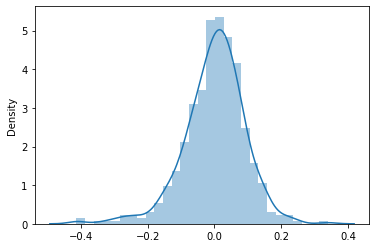

In [46]:
# Residual analysis
residual = y_train - y_train_pred
sns.distplot(residual)
plt.show()

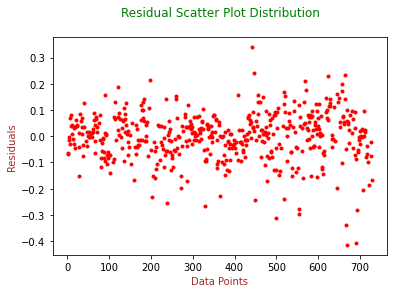

In [47]:
plt.plot(residual, "ro", markersize=3)
plt.title("Residual Scatter Plot Distribution\n", fontdict={"fontsize": 12, "fontweight": 5, "color":"green"})
plt.xlabel("Data Points", fontdict={"fontsize": 10, "fontweight": 5, "color":"brown"})
plt.ylabel("Residuals", fontdict={"fontsize": 10, "fontweight": 5, "color":"brown"})
plt.show()

### Interpretation
- The error terms are normally distributed
- The error terms are independent of each other
- Hence, the overall model is a good fit model and is reliable to predict

# Stage 7

## Predicting and evaluating the model

In [48]:
# Creating list of features that needs to be rescaled for training dataset
features = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Fitting and transforming the data
df_test[features] = scaler.transform(df_test[features])
df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_8,mnth_9,day_1,day_2,day_3,day_4,day_5,day_6,weather_2,weather_3
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,1,0
536,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
300,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,1,0
222,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,1,0,0,0,0,0,1,0,0,0
153,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Interpretation
- __Note__: we haven't used the fit_transform method on the test dataset because, we want to treat test dataset as a newly observed data and let the model decide how to transform the data

In [49]:
# Creating X and y
y_test = df_test.pop("cnt")
X_test = df_test
print("y_test shape: ", y_test.shape)
print("X_test shape: ", X_test.shape)

y_test shape:  (220,)
X_test shape:  (220, 28)


## Extracting the columns we used for model building

In [50]:
# Extracting the same columns that were used in the final model
X_test = X_test[['yr', 'temp', 'windspeed', 'summer', 'winter', 'mnth_8',
       'mnth_9', 'day_1', 'day_2', 'weather_2', 'weather_3']]
X_test.head()

,yr,temp,windspeed,summer,winter,mnth_8,mnth_9,day_1,day_2,weather_2,weather_3
instant,,,,,,,,,,,
185,0,0.831783,0.084219,0,0,0,0,0,0,1,0
536,1,0.901354,0.153728,1,0,0,0,0,0,0,0
300,0,0.511964,0.334206,0,1,0,0,0,0,1,0
222,0,0.881625,0.339570,0,0,1,0,0,0,0,0
153,0,0.817246,0.537414,1,0,0,0,0,0,0,0


In [51]:
# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,temp,windspeed,summer,winter,mnth_8,mnth_9,day_1,day_2,weather_2,weather_3
instant,,,,,,,,,,,,
185,1.0,0,0.831783,0.084219,0,0,0,0,0,0,1,0
536,1.0,1,0.901354,0.153728,1,0,0,0,0,0,0,0
300,1.0,0,0.511964,0.334206,0,1,0,0,0,0,1,0
222,1.0,0,0.881625,0.339570,0,0,1,0,0,0,0,0
153,1.0,0,0.817246,0.537414,1,0,0,0,0,0,0,0


## Prediction

In [52]:
y_test_pred = lm_ols_10.predict(X_test_sm)
print("R2 Score of prediction on testing data = ", round(r2_score(y_test, y_test_pred), 2))

R2 Score of prediction on testing data =  0.8


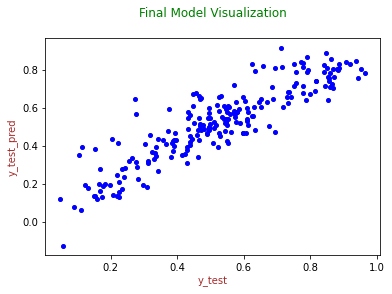

In [53]:
# Visualizing the overall predicted values
plt.plot(y_test, y_test_pred, "bo", markersize=4)
plt.title("Final Model Visualization\n", fontdict={"fontsize": 12, "fontweight": 5, "color":"green"})
plt.xlabel("y_test", fontdict={"fontsize": 10, "fontweight": 5, "color":"brown"})
plt.ylabel("y_test_pred", fontdict={"fontsize": 10, "fontweight": 5, "color":"brown"})
plt.show()

### Interpretation
- Our predicted accuracy on the training dataset was approximately 83% and on the test dataset approximately 80%. Hence, the model is a decent model and is able to generalise on the data very well
- As evident from the above visualization the model is linear in nature